In [50]:
import pandas as pd
import numpy as np
import torch
import sklearn
import torch.nn as nn
import torch.optim as optim
import datetime as dt
import matplotlib.pyplot as plt 
import matplotlib as mpl
%matplotlib inline

In [17]:
df = pd.read_csv('WMT_Earnings.csv', index_col='Date')
df


,Value
Date,
"July 31, 2021",141.05B
"April 30, 2021",138.31B
"January 31, 2021",152.08B
"October 31, 2020",134.71B
"July 31, 2020",137.74B
...,...
"October 31, 1997",29.13B
"July 31, 1997",28.70B
"April 30, 1997",25.70B


In [18]:
#Using this we can select the amount of data to use, some of the very early years aren't formatted properly and will throw an error
df=df.iloc[:50]
df

,Value
Date,
"July 31, 2021",141.05B
"April 30, 2021",138.31B
"January 31, 2021",152.08B
"October 31, 2020",134.71B
"July 31, 2020",137.74B
"April 30, 2020",134.62B
"January 31, 2020",141.67B
"October 31, 2019",127.99B
"July 31, 2019",130.38B


In [19]:
#-- Change the dates into a format that pandas will recognise
df.index = [df.index[i].split()[0]+" "+df.index[i].split()[2] for i in range(len(df.index))]
df.index = pd.to_datetime(df.index)

In [20]:
#-- Put the data in chronological order
df = df.iloc[::-1]
df

,Value
2009-04-01,94.24B
2009-07-01,100.88B
2009-10-01,99.37B
2010-01-01,113.62B
2010-04-01,99.81B
2010-07-01,103.73B
2010-10-01,101.95B
2011-01-01,116.36B
2011-04-01,104.19B
2011-07-01,109.37B


In [21]:
#-- Only select data up to end of 2019
df = df[:'2019']

In [22]:
# Remove the B (standing for billion) from the values and store as float rather than a string
df.Value = [float(df.Value[i][:-1]) for i in range(len(df.Value))]

c:\Users\Vishal\anaconda3\envs\Walmart\lib\site-packages\pandas\core\generic.py:5516: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


In [31]:
train = df.iloc[:35].values
test = df.iloc[35:].values

In [34]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
scaler.fit(train)
train_scaled = scaler.transform(train)

In [35]:
train_scaled = torch.FloatTensor(train_scaled)
print(f'Original dimensions : {train_scaled.shape}')
train_scaled = train_scaled.view(-1)
print(f'Correct dimensions : {train_scaled.shape}')

Original dimensions : torch.Size([35, 1])
Correct dimensions : torch.Size([35])


In [38]:
def get_x_y_pairs(train_scaled, train_periods, prediction_periods):
    """
    train_scaled - training sequence
    train_periods - How many data points to use as inputs
    prediction_periods - How many periods to ouput as predictions
    """
    x_train = [train_scaled[i:i+train_periods] for i in range(len(train_scaled)-train_periods-prediction_periods)]
    y_train = [train_scaled[i+train_periods:i+train_periods+prediction_periods] for i in range(len(train_scaled)-train_periods-prediction_periods)]
    
    #-- use the stack function to convert the list of 1D tensors
    # into a 2D tensor where each element of the list is now a row
    x_train = torch.stack(x_train)
    y_train = torch.stack(y_train)
    
    return x_train, y_train

train_periods = 16 #-- number of quarters for input
prediction_periods = test_periods
x_train, y_train = get_x_y_pairs(train_scaled, train_periods, prediction_periods)
print(x_train.shape)
print(y_train.shape)

torch.Size([11, 16])
torch.Size([11, 8])


In [43]:
class LSTM(nn.Module):
    """
    input_size - will be 1 in this example since we have only 1 predictor (a sequence of previous values)
    hidden_size - Can be chosen to dictate how much hidden "long term memory" the network will have
    output_size - This will be equal to the prediciton_periods input to get_x_y_pairs
    """
    def __init__(self, input_size, hidden_size, output_size):
        super(LSTM, self).__init__()
        self.hidden_size = hidden_size
        
        self.lstm = nn.LSTM(input_size, hidden_size)
        
        self.linear = nn.Linear(hidden_size, output_size)
        
    def forward(self, x, hidden=None):
        if hidden==None:
            self.hidden = (torch.zeros(1,1,self.hidden_size),
                           torch.zeros(1,1,self.hidden_size))
        else:
            self.hidden = hidden
            
        """
        inputs need to be in the right shape as defined in documentation
        - https://pytorch.org/docs/stable/generated/torch.nn.LSTM.html
        
        lstm_out - will contain the hidden states from all times in the sequence
        self.hidden - will contain the current hidden state and cell state
        """
        lstm_out, self.hidden = self.lstm(x.view(len(x),1,-1), 
                                          self.hidden)
        
        predictions = self.linear(lstm_out.view(len(x), -1))
        
        return predictions[-1], self.hidden

In [44]:
model = LSTM(input_size=1, hidden_size=50, output_size=test_periods)
criterion = nn.MSELoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [47]:
epochs = 600
model.train()
for epoch in range(epochs+1):
    for x,y in zip(x_train, y_train):
        y_hat, _ = model(x, None)
        optimizer.zero_grad()
        loss = criterion(y_hat, y)
        loss.backward()
        optimizer.step()

    if epoch%100==0:
        print(f'epoch: {epoch:4} loss:{loss.item():10.8f}')

epoch:    0 loss:0.49267170
epoch:  100 loss:0.01816923
epoch:  200 loss:0.00067455
epoch:  300 loss:0.00060855
epoch:  400 loss:0.00064998
epoch:  500 loss:0.00052460
epoch:  600 loss:0.00049593


In [48]:
model.eval()
with torch.no_grad():
    predictions, _ = model(train_scaled[-train_periods:], None)

#-- Apply inverse transform to undo scaling
predictions = scaler.inverse_transform(np.array(predictions.reshape(-1,1)))

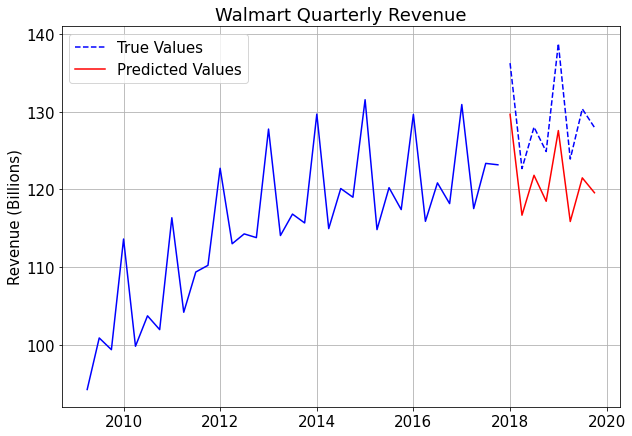

In [51]:
x = [dt.datetime.date(d) for d in df.index]
font = {'size':15}

mpl.rc('font', **font)
fig = plt.figure(figsize=(10,7))
plt.title('Walmart Quarterly Revenue')
plt.ylabel('Revenue (Billions)')
plt.grid(True)
plt.plot(x[:-len(predictions)], df.Value[:-len(predictions)], "b-")
plt.plot(x[-len(predictions):], df.Value[-len(predictions):], "b--", label='True Values')
plt.plot(x[-len(predictions):], predictions, "r-", label='Predicted Values')
plt.legend()
plt.savefig('plot1', dpi=600)